In [6]:
import json
import re
import matplotlib.pyplot as plt
from utils import collapse_annotations

In [7]:
train_set = json.load(open('train.json'))
dev_set = json.load(open('dev.json'))
test_set = json.load(open('test.json'))
data_all = train_set | dev_set | test_set

In [8]:
min_num_frames = 50
ratio_low_threshold, ratio_high_threshold = 0.4, 0.6

In [9]:
man_noun, woman_noun = 'n10287213', 'n10787470'
man_count, woman_count = 0, 0
verb_counts = {}
for i, (image, info) in enumerate(data_all.items()):
    verb = info['verb']
    if verb not in verb_counts:
        verb_counts[verb] = {'man': 0, 'woman': 0}
    agents = [frame['agent'] for frame in info['frames'] if 'agent' in frame]
    is_man, is_woman = man_noun in agents, woman_noun in agents
    if is_man and not is_woman:
        verb_counts[verb]['man'] += 1
    if is_woman and not is_man:
        verb_counts[verb]['woman'] += 1

In [12]:
sum(x['woman'] for x in verb_counts.values()) / (sum(x['woman'] for x in verb_counts.values()) + sum(x['man'] for x in verb_counts.values()))

0.3950348569445759

(array([48.,  7.,  4.,  8.,  9.,  4.,  5.,  6.,  5.,  8.,  9.,  9.,  8.,
         7.,  8., 12., 12., 11., 15., 15., 17., 17., 21., 23., 29., 16.,
        15., 19., 10., 17.,  9.,  6., 19.,  8., 11., 10.,  7.,  7.,  6.,
         2.,  5.,  5.,  4.,  2.,  2.,  3.,  1.,  0.,  1.,  2.]),
 array([  0.  ,   6.02,  12.04,  18.06,  24.08,  30.1 ,  36.12,  42.14,
         48.16,  54.18,  60.2 ,  66.22,  72.24,  78.26,  84.28,  90.3 ,
         96.32, 102.34, 108.36, 114.38, 120.4 , 126.42, 132.44, 138.46,
        144.48, 150.5 , 156.52, 162.54, 168.56, 174.58, 180.6 , 186.62,
        192.64, 198.66, 204.68, 210.7 , 216.72, 222.74, 228.76, 234.78,
        240.8 , 246.82, 252.84, 258.86, 264.88, 270.9 , 276.92, 282.94,
        288.96, 294.98, 301.  ]),
 <BarContainer object of 50 artists>)

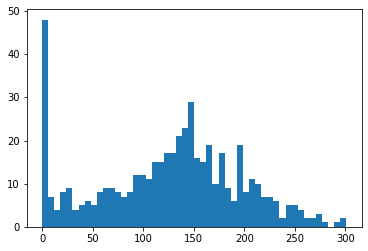

In [13]:
plt.hist([x['woman']+x['man'] for x in verb_counts.values()], bins=50)

In [14]:
verb_ratios = {verb: counts['woman'] / (counts['man'] + counts['woman']) for verb, counts in verb_counts.items() if counts['man'] + counts['woman'] > min_num_frames}

In [15]:
[(k, v) for k, v in sorted(verb_ratios.items(), key=lambda x: x[1], reverse=True)]

[('cheerleading', 1.0),
 ('curtsying', 0.9855072463768116),
 ('manicuring', 0.9719101123595506),
 ('curling', 0.9617834394904459),
 ('braiding', 0.9251700680272109),
 ('moisturizing', 0.9074889867841409),
 ('waxing', 0.8867924528301887),
 ('nagging', 0.8721804511278195),
 ('calming', 0.8674698795180723),
 ('spinning', 0.8541666666666666),
 ('arching', 0.8341968911917098),
 ('sewing', 0.831081081081081),
 ('bathing', 0.8279569892473119),
 ('dusting', 0.8160377358490566),
 ('arranging', 0.8071065989847716),
 ('giggling', 0.7956204379562044),
 ('combing', 0.7909604519774012),
 ('applying', 0.7906976744186046),
 ('shopping', 0.7894736842105263),
 ('grieving', 0.7814569536423841),
 ('stitching', 0.7716535433070866),
 ('puckering', 0.7714285714285715),
 ('drying', 0.7712418300653595),
 ('microwaving', 0.7705882352941177),
 ('buttering', 0.7704918032786885),
 ('dancing', 0.7640449438202247),
 ('soaking', 0.7560975609756098),
 ('flossing', 0.7433628318584071),
 ('wrinkling', 0.7421383647798742

(array([ 9., 13., 16., 17., 14., 16., 15., 26., 23., 26., 28., 20., 21.,
        24., 21., 28., 12.,  8., 11., 14., 10.,  7.,  7., 10.,  5.,  2.,
         2.,  2.,  1.,  3.]),
 array([0.01351351, 0.0463964 , 0.07927928, 0.11216216, 0.14504505,
        0.17792793, 0.21081081, 0.24369369, 0.27657658, 0.30945946,
        0.34234234, 0.37522523, 0.40810811, 0.44099099, 0.47387387,
        0.50675676, 0.53963964, 0.57252252, 0.60540541, 0.63828829,
        0.67117117, 0.70405405, 0.73693694, 0.76981982, 0.8027027 ,
        0.83558559, 0.86846847, 0.90135135, 0.93423423, 0.96711712,
        1.        ]),
 <BarContainer object of 30 artists>)

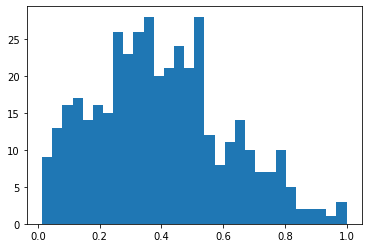

In [40]:
plt.hist(verb_ratios.values(), bins=30)

In [41]:
selected_ratios = {verb: ratio for verb, ratio in verb_ratios.items() if ratio < ratio_low_threshold or ratio > ratio_high_threshold}

(array([ 9., 13., 16., 17., 14., 16., 15., 26., 23., 26., 28., 16.,  0.,
         0.,  0.,  0.,  0.,  2., 11., 14., 10.,  7.,  7., 10.,  5.,  2.,
         2.,  2.,  1.,  3.]),
 array([0.01351351, 0.0463964 , 0.07927928, 0.11216216, 0.14504505,
        0.17792793, 0.21081081, 0.24369369, 0.27657658, 0.30945946,
        0.34234234, 0.37522523, 0.40810811, 0.44099099, 0.47387387,
        0.50675676, 0.53963964, 0.57252252, 0.60540541, 0.63828829,
        0.67117117, 0.70405405, 0.73693694, 0.76981982, 0.8027027 ,
        0.83558559, 0.86846847, 0.90135135, 0.93423423, 0.96711712,
        1.        ]),
 <BarContainer object of 30 artists>)

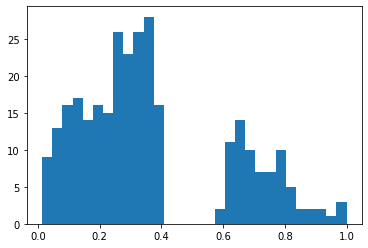

In [42]:
plt.hist(selected_ratios.values(), bins=30)

In [21]:
selected_woman_verbs = [k for k, v in selected_ratios.items() if v > 0.5]
selected_man_verbs = [k for k, v in selected_ratios.items() if v < 0.5]

In [23]:
selected_woman_verbs, selected_man_verbs

(['twisting',
  'disciplining',
  'wrinkling',
  'rinsing',
  'telephoning',
  'exercising',
  'arching',
  'soaking',
  'washing',
  'giggling',
  'dancing',
  'moistening',
  'manicuring',
  'scrubbing',
  'combing',
  'crowning',
  'microwaving',
  'cooking',
  'biting',
  'browsing',
  'brushing',
  'grieving',
  'massaging',
  'dipping',
  'typing',
  'mashing',
  'chewing',
  'sewing',
  'shopping',
  'jogging',
  'curling',
  'reassuring',
  'shelling',
  'dusting',
  'whisking',
  'stretching',
  'emerging',
  'potting',
  'scolding',
  'cheerleading',
  'braiding',
  'weeping',
  'arranging',
  'erasing',
  'buying',
  'calming',
  'applying',
  'curtsying',
  'folding',
  'drying',
  'picking',
  'buttering',
  'hanging',
  'moisturizing',
  'calling',
  'smelling',
  'kneading',
  'providing',
  'packing',
  'twirling',
  'wrapping',
  'stitching',
  'spinning',
  'smearing',
  'dyeing',
  'smiling',
  'skipping',
  'bathing',
  'decorating',
  'pinching',
  'waxing',
  'roc